# Assignment 9: Free Recall Analysis
## Computational Methods in Psychology (and Neuroscience)
### Psychology 4215/7215 --- Fall 2021


# Objectives

Upon completion of this assignment, students will have:

1. Read in free recall data
2. Calculate accuracy and temporal factor like the class lecture
3. Combine those two DataFrames
4. Test the relationship between temporal factor and accuracy as a function of condition (Control vs. DRM)

# Assignment

* Write code in a Jupyter notebook (after making a copy and renaming it to have your userid in the title --- e.g., A09_Free_Recall_Analysis_mst3k).


## Details

Way back in 2010, I published a paper that demonstrated a positive relationship between the total number of items recalled and the degree of temporal clustering (Sederberg et al. 2010, *Memory & Cognition*). For this assignment we're going to test whether we see trends of that same effect holding up in the small dataset we collected in class (note, it usually takes more data to see a stable significant result.)

Below is code that will load in the preprocessed data from the free recall experiment. As long as you have updated this repository from GitHub, including downloading the `FR_egg_all.egg` file, the code should work unchanged to load in the data and run the two key analyses to calculate accuracy and temporal factor (the measure of temporal clustering).

Your task is to run a regression and then plot the result of accuracy as a function of temporal factor and list condition (Control or DRM).

All the code you need to perform these analyses is in the recent lesson notebooks. 

We have some code below to help you get started reading in the data, so that you can focus on the regression and plot. 

**I've left in the output of what the results should look like as a guide so you know when you have everything right.**

* ***When you are done, save this notebook as HTML (`File -> Download as -> HTML`) and upload it to the matching assignment on UVACollab.***  

# New libraries to install

You're going to need a new plotting library, so run this line at your Anaconda Prompt/Terminal:

`conda install -c conda-forge plotnine` 

You'll also need this library for free recall analysis:

`pip install quail` 

## General Imports

In [23]:
# import some useful libraries
import numpy as np                # numerical analysis linear algebra
import pandas as pd               # efficient tables
import matplotlib.pyplot as plt   # plotting
import scipy.stats.distributions as dists     # probability distributions
from scipy import stats

# plotnine for a plot
import plotnine as pn

# statsmodels for stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

# make sure to load quail!!!
import quail

## Load the Quail EGG

In [2]:
egg_all = quail.load_egg('FR_egg_all.egg')
egg_all.info()

Number of subjects: 13
Number of lists per subject: 10
Number of words per list: 12
Date created: Tue Nov 16 20:31:12 2021
Meta data: {}


In [11]:
# set up the list groups
# first lists per subj are Control, next are DRM
listgroup = ['Control']*(egg_all.n_lists//2) + ['DRM']*(egg_all.n_lists//2)
listgroup

['Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'DRM',
 'DRM',
 'DRM',
 'DRM',
 'DRM']

## Calculate the values of interest

In [15]:
# calculate accuracy
acc = quail.analyze(egg_all, analysis='accuracy', 
                    listgroup=listgroup)
acc_df = acc.get_data().reset_index()
cols = list(acc_df.columns)
cols[2] = 'Accuracy'
acc_df.columns = cols
acc_df.head()

,Subject,List,Accuracy
0,0,Control,0.283333
1,0,DRM,0.516667
2,1,Control,0.316667
3,1,DRM,0.500000
4,2,Control,0.366667


In [17]:
# calculate temporal factor
tfact = quail.analyze(egg_all, analysis='temporal', 
                      listgroup=listgroup)
tf_df = tfact.get_data().reset_index()
cols = list(tf_df.columns)
cols[2] = 'TemFact'
tf_df.columns = cols
tf_df.head()

,Subject,List,TemFact
0,0,Control,0.738737
1,0,DRM,0.607766
2,1,Control,0.538030
3,1,DRM,0.548819
4,2,Control,0.562283


In [20]:
# Merge the two data frames into a single data frame
df = pd.merge(acc_df, tf_df, on=['Subject', 'List'])

# Your code goes below here

All code above should work without modification.

In [21]:
# set up a model with Accuracy as the dependent variable
# predicted by the interaction between Temporal Factor (TemFact)
# and list condition (List)
# HINT: use the `smf.ols` function from the lessons


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Accuracy   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     2.061
Date:                Tue, 16 Nov 2021   Prob (F-statistic):              0.135
Time:                        21:12:10   Log-Likelihood:                 11.122
No. Observations:                  26   AIC:                            -14.24
Df Residuals:                      22   BIC:                            -9.211
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0392      0.393     -0.100      0.921      -0.855       0.776
List[T.DRM]             0.2442      0.561      0.435      0.668      -0.920       1.408
TemFact                 0.8528      0.613      1.391      0.178      -0.418       2.124
TemFact:List[T.DRM]    -0.1187      0.929     -0.128      0.900      -2.046       1.809
==============================================================================
Omnibus:                        3.523   Durbin-Watson:                   0.934
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                1.919
Skew:                           0.555   Prob(JB):                        0.383
Kurtosis:                       3.735   Cond. No.                         47.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# test for significance with a type 2 ANOVA
# hint, use the `sm.stats.anova_lm` function (as seen in previous classes)


,sum_sq,df,F,PR(>F)
List,0.160730,1.0,5.464643,0.028905
TemFact,0.088938,1.0,3.023786,0.096028
TemFact:List,0.000480,1.0,0.016321,0.899503
Residual,0.647078,22.0,NaN,NaN


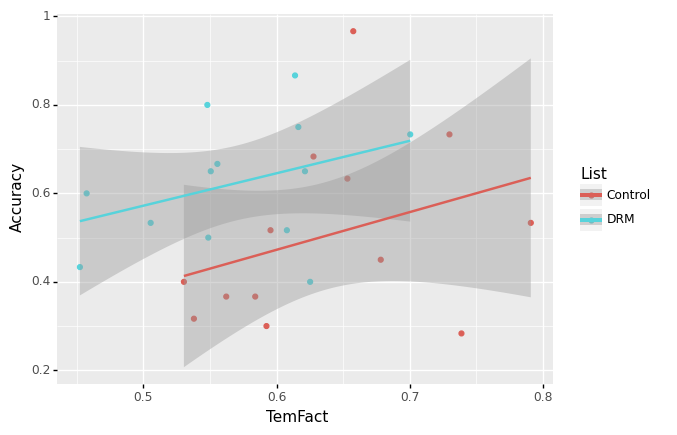

<ggplot: (8737448694384)>

In [28]:
# use plotnine to make a plot of the results with
# Accuracy as a function of TemFact, with separate colors for list condition (List)
# YOU FILL IN THE AAA, BBB, CCC below
p = (pn.ggplot(df, pn.aes('AAA', 'BBB', color='CCC'))
     + pn.geom_point()   # adds each data point
     + pn.geom_smooth(method='lm') # adds a linear model fit
    )  
p